# Handling Imbalanced Datasets


1.   Using RandomForest 
2.   Under Sampling
3.   Over Sampling
4.   SmotTomek



In [65]:
!pip install imblearn        # ImbalancedLearn



In [66]:
!pip install sklearn

In [67]:
!pip install seaborn


In [68]:
!pip install pandas

In [69]:
!pip install numpy

In [70]:
import pandas as pd

import seaborn as sns

import numpy as np

ERROR: Invalid requirement: '#'


In [71]:
# kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv download link for imbalanced datasetdf = pd.read_csv('creditcard.csv')


# df.head()

df.shape

(284807, 31)

In [72]:
df.isnull().sum().sum()    # checking null sum in  entire DataFrame

0

In [73]:
df.shape

(284807, 31)

c:\users\surya\anaconda3\envs\tf1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

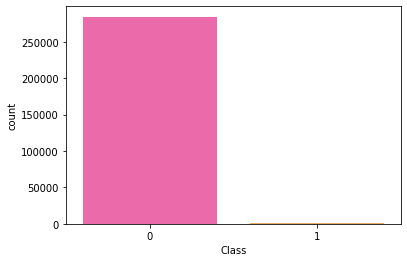

In [74]:
sns.countplot(df.Class,palette='spring')

In [75]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Imbalanced target  because ratio of class 0 and class 1 has huge differennce.**
* Out of 284807 only 492 are 1's but 284315 no of 0's are there.






In [76]:
X = df.drop('Class',axis=1)

y = df.Class

In [77]:
from sklearn.model_selection import  train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.3)    

In [79]:
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)



In [80]:
rfc.score(X_test,y_test)

0.9996254813150287

# Under Sampling or Down Sampling

In [88]:
!pip install imblearn

In [87]:
from imblearn.under_sampling import  NearMiss

In [89]:
from collections import Counter

In [90]:
US = NearMiss()

In [91]:
X_under,y_under = US.fit_sample(X,y)

In [92]:
y.shape   # Before under sampling there are 284807 records

(284807,)

In [93]:
y_under.shape  # After under_sampling there are 984 records that means 492 1's and 492 0's

(984,)

Here we are decreasing 284807 records to 984. In 984 equally data are separated 
like 492 Zeroes and 492 Ones as shown below.



In [94]:
print(f"Before Under Sampling Target contains : {Counter(y)}")

print()

print(f"After Under Sampling Target contains : {Counter(y_under)}")

Before Under Sampling Target contains : Counter({0: 284315, 1: 492})

After Under Sampling Target contains : Counter({0: 492, 1: 492})


c:\users\surya\anaconda3\envs\tf1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

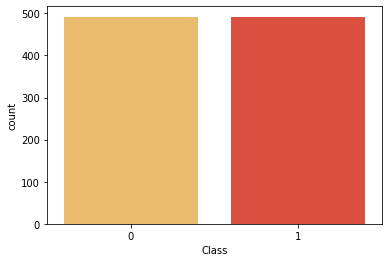

In [95]:
sns.countplot(y_under,palette='YlOrRd')

# Over Sampling

In [96]:
from imblearn.over_sampling import RandomOverSampler

In [97]:
os = RandomOverSampler()

In [98]:
X_over,y_over = os.fit_sample(X,y)

In [99]:
X_over.shape,y_over.shape

((568630, 30), (568630,))

In [100]:
print(f"Before Over Sampling Target Contains : {Counter(y)}")

print()

print(f"After Over Sampling Target Contains : {Counter(y_over)}")

Before Over Sampling Target Contains : Counter({0: 284315, 1: 492})

After Over Sampling Target Contains : Counter({0: 284315, 1: 284315})


c:\users\surya\anaconda3\envs\tf1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

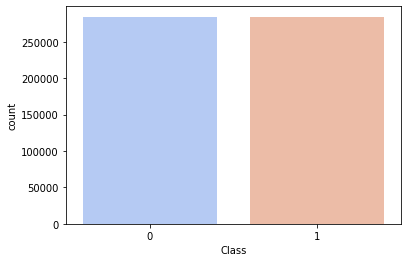

In [101]:
sns.countplot(y_over,palette='coolwarm')

Here we are increasing 492 ones to 284315 as shown above

# Smote (Synthetic Minority Over Sampling Technique)

It is a combination of both Under Sampling and Over Sampling

In [102]:
from imblearn.combine import SMOTETomek    #By adding Tomek Links

In [103]:
SMT = SMOTETomek()

In [106]:
X_SMT,y_SMT = SMT.fit_sample(X,y)

In [107]:
print(f"Before Smote  Target contains : {Counter(y)}")

print()

print(f"After Smote  Target contains : {Counter(y_SMT)}")

Before Smote  Target contains : Counter({0: 284315, 1: 492})

After Smote  Target contains : Counter({0: 283794, 1: 283794})


c:\users\surya\anaconda3\envs\tf1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

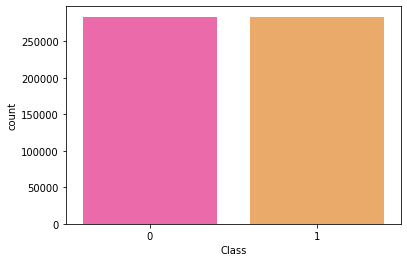

In [108]:
sns.countplot(y_SMT,palette='spring')